<a></a>
   # ** &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;House Rent Prediction**

<a id="1"></a>
## 1.**Introduction**

&nbsp;&nbsp; The task at hand is to predict house rents for the houses which are for sale. We can consider this problem as supervised learning problem where we have the target variable(rent) and predictors for some data points and we have to predict the target variable for data points which doesn't have the target variable(houses which are for sale). House price/rent prediction is an interesting domain which allows us to play with numerous algorithms-The freedom which may not be available with any other domains. In this notebook, exploratory data analysis is performed and some predictive models are built for the data available.

<a id="0"></a>
## **Contents**

[1. Introduction](#1)  
[2. Loading Libraries](#2)  
[3. Importing Data](#3)  
[4. Data Cleaning ](#4)

&nbsp; &nbsp;&nbsp; &nbsp; [4.1. Basic Properties](#4-1)

&nbsp; &nbsp;&nbsp; &nbsp; [4.2 Treating Misisng Data](#4-2)

&nbsp; &nbsp;&nbsp; &nbsp; [4.3 Treating Outliers](#4-3)


[5. Exploratory Data Analysis(EDA)](#5)

&nbsp; &nbsp;&nbsp; &nbsp; [5.1  Locality](#5.1)

&nbsp; &nbsp;&nbsp; &nbsp; [5.2  ZipCode](#5.2)

&nbsp; &nbsp;&nbsp; &nbsp; [5.3  Area Space](#5.3)

&nbsp; &nbsp;&nbsp; &nbsp; [5.4  Bedrooms](#5.4)

&nbsp; &nbsp;&nbsp; &nbsp; [5.5 Bathrooms](#5.5)

[6. Model Building](#6)

&nbsp; &nbsp;&nbsp; &nbsp; [6.1. Preprocessing](#6-1)

&nbsp; &nbsp;&nbsp; &nbsp; [6.2. Linear Regression](#6-2)

&nbsp; &nbsp;&nbsp; &nbsp; [6.3. Lasso Regression](#6-3)

&nbsp; &nbsp;&nbsp; &nbsp; [6.4. Random Forest](#6-4)

&nbsp; &nbsp;&nbsp; &nbsp; [ 6.5. XGBoost](#6-5)


[7. Future Work](#7)


<a id="2"></a>
## 2.**Loading Libraries**

In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import LabelEncoder
import numpy as np
from sklearn.preprocessing import Imputer
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt
import seaborn as sns
from scipy import stats
from xgboost import XGBRegressor
from scipy.stats import uniform, randint
from sklearn.model_selection import cross_val_score, GridSearchCV, KFold, RandomizedSearchCV, train_test_split
from sklearn import datasets, linear_model
from sklearn.manifold import TSNE

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


<a id="3"></a>
## 3.**Importing Data**

The data extracted has ";" as the seperator but there are some records where ";" is used as a part of the description. Therfore, those rows has to be removed from the data. 'error_bad_lines=False' does this for us.

In [2]:
zillowData=pd.read_csv(r'D:\Datasets\Zillow\zillow.csv',sep=";",error_bad_lines=False,encoding='latin-1')

b'Skipping line 306: expected 17 fields, saw 19\nSkipping line 468: expected 17 fields, saw 18\nSkipping line 493: expected 17 fields, saw 18\nSkipping line 538: expected 17 fields, saw 18\nSkipping line 799: expected 17 fields, saw 18\nSkipping line 800: expected 17 fields, saw 18\nSkipping line 801: expected 17 fields, saw 18\nSkipping line 802: expected 17 fields, saw 18\nSkipping line 803: expected 17 fields, saw 18\nSkipping line 804: expected 17 fields, saw 18\nSkipping line 805: expected 17 fields, saw 18\nSkipping line 806: expected 17 fields, saw 18\nSkipping line 807: expected 17 fields, saw 18\nSkipping line 808: expected 17 fields, saw 18\nSkipping line 809: expected 17 fields, saw 18\nSkipping line 810: expected 17 fields, saw 18\nSkipping line 811: expected 17 fields, saw 18\nSkipping line 812: expected 17 fields, saw 18\nSkipping line 813: expected 17 fields, saw 18\nSkipping line 814: expected 17 fields, saw 18\nSkipping line 815: expected 17 fields, saw 18\nSkipping li

<a id="4"></a>
## 4. **Data Cleaning**

<a id="4-1"></a>
### 4.1. Basic Properties

Let us view some basic properties and charecteriscs of the current dataset.

In [3]:
print("Columns in the dataset:")
print(list(zillowData.columns),"z\n")
print("Number of records in the dataset:",len(zillowData.index))

Columns in the dataset:
['ZPID', 'Type', 'ZipCode', 'Locality', 'State', 'Latitude', 'Longitude', 'Status', 'Description', 'CardBadge', 'Bedrooms', 'Bathrooms', 'Price', 'AreaSpace', 'Price/sqft', 'Mortgage', 'CashFlow'] z

Number of records in the dataset: 4424


In [4]:
#Contents in the dataset
zillowData.head(2)

,ZPID,Type,ZipCode,Locality,State,Latitude,Longitude,Status,Description,CardBadge,Bedrooms,Bathrooms,Price,AreaSpace,Price/sqft,Mortgage,CashFlow
0,2086649593,rent,22201,Arlington,VA,38.888504,-77.095484,Apartment for rent,NaN,Updated today,1.0,1.0,1750.0,665.0,2.6,777720.0,-773.0
1,1001453804,rent,22201,Arlington,VA,38.885677,-7.709257,Zoso Flats,Move-in Special: Receive $1000 Off January Ren...,21 photos,1.0,1.0,2300.0,615.0,3.7,1021842.0,-1015.0


Some of the models we are going to use are sensitive to missing values and outliers. Therefore, the data needs to be cleaned before we proceed further. 

<a id="4-2"></a>
### 4.2. Treating Missing Data

Let us view the percentage of missing values in each column.

In [5]:
zillowData.isna().sum()/len(zillowData.index)*100

ZPID            0.000000
Type            0.000000
ZipCode         0.000000
Locality        0.000000
State           0.000000
Latitude        0.000000
Longitude       0.000000
Status          0.000000
Description    21.948463
CardBadge       0.135624
Bedrooms        2.373418
Bathrooms       2.056962
Price           1.604882
AreaSpace       2.350814
Price/sqft      2.848101
Mortgage        1.604882
CashFlow        1.604882
dtype: float64

Except description, none of the columns have high percentage of missing values. Due to the small percentage, we can remove the entries which have missing values for important featues like bedrooms, bathrooms and area space.

In [6]:
zillowData = zillowData[np.isfinite(zillowData['Price'])]
zillowData=zillowData.dropna(axis=0, subset=['AreaSpace','Bedrooms','Bathrooms'],how='any')

<a id="4-3"></a>
### 4.3. Treating Outliers

We can use records of type 'rent' to develop models which predicts rent. We can use those models to predict 'rent' for the records of type 'sale'.

In [7]:
zillowData=zillowData.loc[zillowData['State']=='VA']
#Split the data into rent and sale.
rentData=zillowData.loc[zillowData['Type']=='rent']
saleData=zillowData.loc[zillowData['Type']=='sale']
print("Number of records of type 'rent':",len(rentData.index))

Number of records of type 'rent': 3771


Let us visualize the distribution of rent

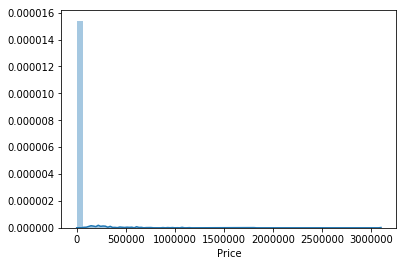

In [8]:
#Distribution plot of rent
sns.distplot(rentData['Price']);

From the distribution plot we can observe that the rent varies from 0 to 3 million. Rent of 3 million does not make any sense. Some of the records should have been misclassified as 'rent' instead of 'sale'. Let us treat the outliers with z transformation. 

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


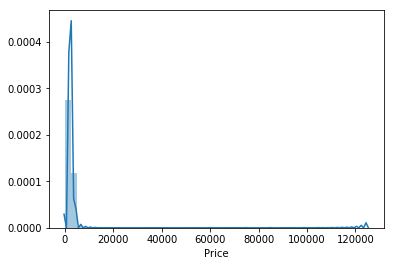

In [9]:
rentData['z-value'] = (rentData['Price'] - rentData['Price'].mean())/rentData['Price'].std(ddof=0)
rentData.drop(rentData[rentData['z-value'] > 1].index, inplace=True)
#Distribution of rent after z-transformation.
sns.distplot(rentData['Price']);

We can observe that the data is highly skewed towards the right. Still the outliers which the data has does not reperesent the possible rent a property could have. Therfore, value of 6000 is taken as a threshold. Let us visualize the distribution after removing outliers above the threshold.

Number of records after removing outliers:  3579


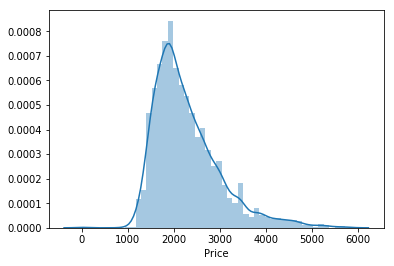

In [10]:
rentData=rentData.loc[rentData['Price']<6000]
sns.distplot(rentData['Price']);
print("Number of records after removing outliers: ",len(rentData.index))

Now, we got a near normal distribution. We can proceed for analysis with this data.

<a id="5"></a>
## 5. Exploratory Data Analysis

Let us visualize the distribution of rent across different localities of Virginia.

<a id="5-1"></a>
### 5.1. **Locality**

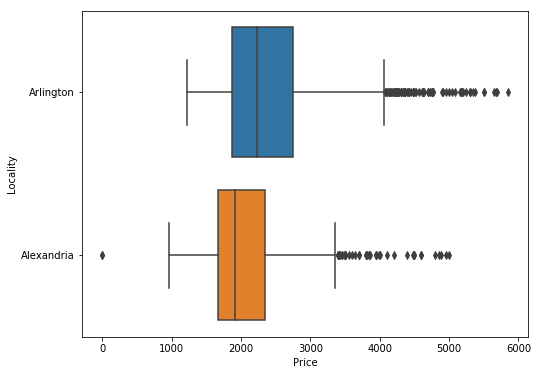

In [11]:
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x="Price", y="Locality", data=rentData)

The rent in Alexandria is skwed towards right and house rent in Arlington has lot of outliers. From this we can obseve that Arlington has more houses with high rents. This could be an important feature in our models. Now let us visualize the distribution of rent across zipcodes.

<a id="5-2"></a>
### 5.2. Zipcode

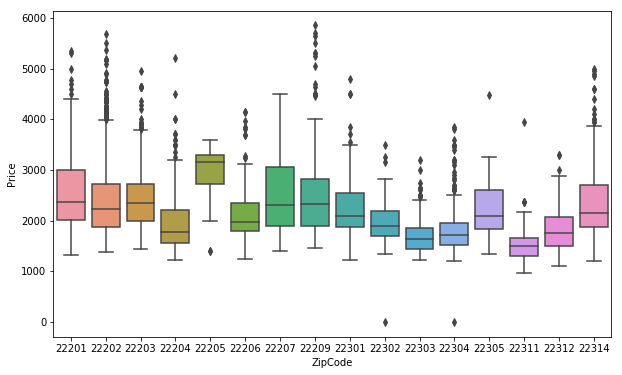

In [12]:
f, ax = plt.subplots(figsize=(10, 6))
fig = sns.boxplot(x="ZipCode", y="Price", data=rentData)

<a id="5-3"></a>
### 5.3. Area Space

Relationship between area space and rent seems to be linearly corelated. The regression plot between them are shown below.

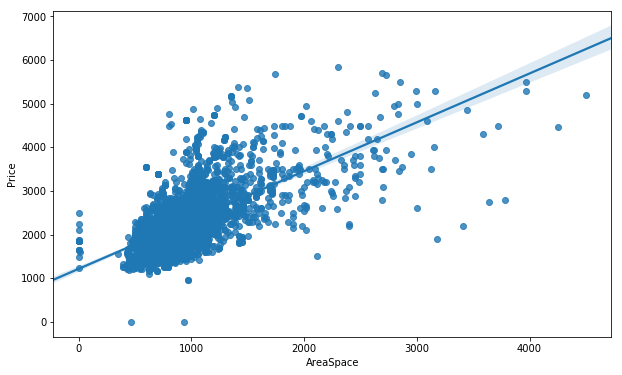

In [13]:
f, ax = plt.subplots(figsize=(10, 6))
fig = sns.regplot(x="AreaSpace", y="Price", data=rentData)

<a id="5-4"></a>
### 5.4. Bedrooms

Let us visualize the distribution of rent for differnt categorical predictors.

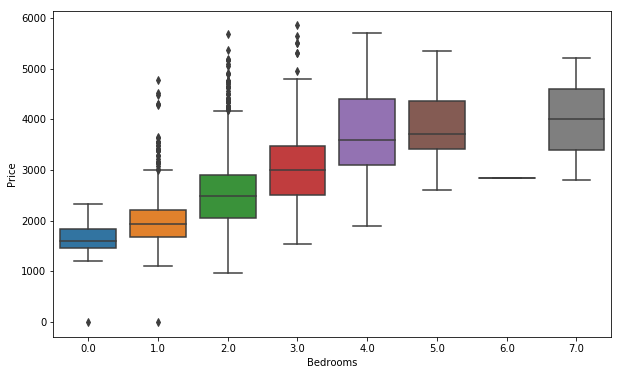

In [14]:
f, ax = plt.subplots(figsize=(10, 6))
fig = sns.boxplot(x="Bedrooms", y="Price", data=rentData)

<a id="5-5"></a>
### 5.5. Bathrooms

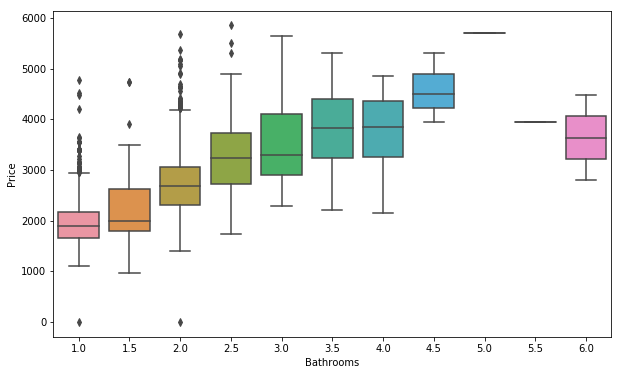

In [15]:
f, ax = plt.subplots(figsize=(10, 6))
fig = sns.boxplot(x="Bathrooms", y="Price", data=rentData)

As expected, all of these features seems to be good predicotrs for predicting rent.

<a id="6"></a>
## 6.**Model Building**

<a id="6-1"></a>
### 6.1. Preprocessing

Before moving to the modeling, let us remove features will not be useful. Featurs like 'Cashflow', 'Price/sqft' and 'Mortgage' directly determine rent and may not be present in records of type 'sale'. Therefore those features are removed.

In [16]:

rentData.drop(['CardBadge', 
                'Status', 'Description','State','Type','ZPID','Mortgage','CashFlow','Price/sqft','z-value',], axis=1, inplace=True)

print("Columns after removing some predictors: ",list(rentData.columns))

Columns after removing some predictors:  ['ZipCode', 'Locality', 'Latitude', 'Longitude', 'Bedrooms', 'Bathrooms', 'Price', 'AreaSpace']


Categorical predictors need to be encoded to be used in predictive models. Therfore, categorical features are encoded and predictors are split into train and test sets so that models can be cross validated.

In [17]:
rentData = pd.get_dummies( rentData, columns = ['ZipCode','Locality'] )
train_features, test_features, train_labels, test_labels = train_test_split(rentData.loc[:, rentData.columns != 'Price'], rentData['Price'], test_size = 0.25, random_state = 42)

<a id="6-2"></a>
### 6.2. Linear Regression

A simple baseline model would give us an idea about accuracy and error. We can improve the model and decrease error from the baseline solution further. Root mean squared error on test data after running a linear regression model is shown below.

In [18]:
regr = linear_model.LinearRegression()
regr.fit(train_features, train_labels)
lmPredictions = regr.predict(test_features)
print("RMSE on test data:",sqrt(mean_squared_error(lmPredictions,test_labels)))

RMSE on test data: 419.8985826432038


RMSE is around 419. That is, our model predicts rent for the houses which does not have information about rent with the accuracy of (+/-) $419.

<a id="6-3"></a>
### 6.3. Lasso Regression

Root mean squared error on test data after running lasso regression model is shown below.

In [19]:
lassoModel= linear_model.Lasso(alpha=1.0)
lassoModel.fit(train_features, train_labels)
predictions = lassoModel.predict(test_features)
print("RMSE on test data:",sqrt(mean_squared_error(predictions,test_labels)))

RMSE on test data: 422.870815490899


Lasso model is performing poorer than our baseline model. Let us try some more algorithms.

<a id="6-4"></a>
### 6.4. Random Forest

Root mean squared error on test data after running random forest model is shown below.

In [20]:
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
train_labels=train_labels.convert_objects(convert_numeric=True)
train_features=np.nan_to_num(train_features)
rf.fit(train_features, train_labels)
predictions = rf.predict(test_features)
print("RMSE on test data:",sqrt(mean_squared_error(predictions,test_labels)))

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use Series.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  


RMSE on test data: 280.8104460961389


We can observe that the RMSE has decreased drastically from our baseline model. Random forest models also help in finding the importance of various features in predicting the rent. Features and their imortance are shown below.

In [21]:
def plot_feature_importances(clf, X_train, y_train=None, 
                             top_n=10, figsize=(8,8), print_table=False, title="Feature Importances"):
            
    feat_imp = pd.DataFrame({'importance':clf.feature_importances_})    
    feat_imp['feature'] = X_train.columns
    feat_imp.sort_values(by='importance', ascending=False, inplace=True)
    feat_imp = feat_imp.iloc[:top_n]
    
    feat_imp.sort_values(by='importance', inplace=True)
    feat_imp = feat_imp.set_index('feature', drop=True)
    feat_imp.plot.barh(title=title, figsize=figsize)
    plt.xlabel('Feature Importance Score')
    plt.show()
    
    if print_table:
        from IPython.display import display
        print("Top {} features in descending order of importance".format(top_n))
        display(feat_imp.sort_values(by='importance', ascending=False))
        
    return feat_imp

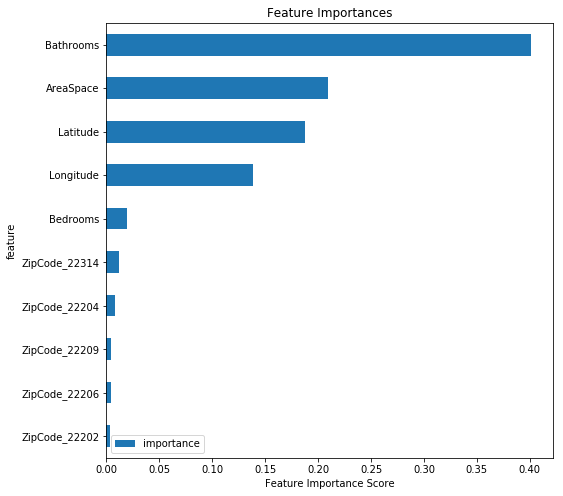

,importance
feature,
ZipCode_22202,0.003038
ZipCode_22206,0.003974
ZipCode_22209,0.003989
ZipCode_22204,0.007988
ZipCode_22314,0.011878
Bedrooms,0.019231
Longitude,0.138731
Latitude,0.188071
AreaSpace,0.209424


In [22]:
plot_feature_importances(rf,rentData.loc[:, rentData.columns != 'Price'])

It is surprising that number of bathrooms in the house is more important predictor than zipcode or number of bedrooms.

<a id="6-5"></a>
### 6.5. XGBoost

XGBoost or Extreme Gradient Boosting is an algorithm which has become popular recently and has been a part of many prize winning competetion entries in Kaggle. Randomized Search CV helps us find the optimal hyperparameters for the XGBoost model by searching and cross-validating in the given space. The results of Randomized Search CV are shown below.

In [23]:
def report_best_scores(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")

In [24]:
xgb = XGBRegressor()
params = {
    "colsample_bytree": uniform(0.7, 0.3),
    "gamma": uniform(0, 0.5),
    "learning_rate": uniform(0.03, 0.3), # default 0.1 
    "max_depth": randint(2, 6), # default 3
    "n_estimators": randint(100, 150), # default 100
    "subsample": uniform(0.6, 0.4)
}
search = RandomizedSearchCV(xgb, param_distributions=params, random_state=42, n_iter=200, cv=3, verbose=1, n_jobs=1, return_train_score=True)

#xgb.fit(train_features, train_labels)
search.fit(train_features, train_labels)

report_best_scores(search.cv_results_, 1)


Fitting 3 folds for each of 200 candidates, totalling 600 fits


[Parallel(n_jobs=1)]: Done 600 out of 600 | elapsed:  2.2min finished


Model with rank: 1
Mean validation score: 0.862 (std: 0.013)
Parameters: {'colsample_bytree': 0.9700055925544315, 'gamma': 0.4369450387812576, 'learning_rate': 0.2092239306510925, 'max_depth': 5, 'n_estimators': 144, 'subsample': 0.8660146698185022}



Hyperparameters obtained from the RandomizedSearch are used to develop the XGBoost model. The RMSE after peforming XGBoost is shown below.

In [25]:
xgb = XGBRegressor(colsample_bytree = 0.9700055925544315, gamma = 0.4369450387812576, learning_rate =0.2092239306510925, max_depth = 5, n_estimators = 144,subsample = 0.8660146698185022)
xgb.fit(train_features, train_labels)
predictions = xgb.predict(test_features.as_matrix())
print("RMSE on test data",sqrt(mean_squared_error(predictions,test_labels)))

RMSE on test data 259.8880550796711


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until


We were able to reduce the RMSE further using XGBoost.

<a id="7"></a>
## 7.**Future Work**

1. The dataset being small eliminated possibility of performing deep learning models and models such as Light Gradient Boosting.
2. Stacking all these algorithms and building an ensemble model could improve the accuracy.
3. More features could be extracted from the 'Description' column and text analysis could be performed.